- does the quality of approximation varry with the number of samples? -- done
- plot of errors -- done
- transform error to % -- done
- add control experiment on synthetic data -- done
- show error relatively; eg compare to histogram? -- done
- keep some motivation early to make that sure
- keep plots on parameter sensitivity. -- done on dim = 5, 4

In [53]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.utils import check_random_state
from mutual_info import MutualInfoRBIG
from sklearn.metrics import mutual_info_score


#### Mutual Information original on randomly sampled data for variable sample size

In [54]:
n_sample_size = [20000,30000,40000,50000,60000,70000,80000,90000]

In [55]:
def calculate_mi_original(sample_size, d_dimensions,seed):
    mi_original_list = []
    sample = []
    
    
    for samples in sample_size:
        rng = check_random_state(seed)

        # Generate random Data
        A = rng.rand(2 * d_dimensions, 2 * d_dimensions)

        # Covariance Matrix
        C = A @ A.T
        mu = np.zeros((2 * d_dimensions))

        dat_all = rng.multivariate_normal(mu, C, samples)

        CX = C[:d_dimensions, :d_dimensions]
        CY = C[d_dimensions:, d_dimensions:]

        X = dat_all[:, :d_dimensions]
        Y = dat_all[:, d_dimensions:]
        
        H_X = 0.5 * np.log(2 * np.pi * np.exp(1) *  np.abs(np.linalg.det(CX)))
        H_Y = 0.5 * np.log(2 * np.pi * np.exp(1) * np.abs(np.linalg.det(CY)))
        H = 0.5 * np.log(2 * np.pi * np.exp(1) * np.abs(np.linalg.det(C)))
        
        mi_original = H_X + H_Y - H
        mi_original= mi_original*np.log(2)
        mi_original_list.append(mi_original)
        sample.append(samples)
        
    mi_original_dataFrame = pd.DataFrame({'samples': sample,'mi_original':mi_original_list})
    return mi_original_dataFrame


In [56]:
org_mi1 = calculate_mi_original(n_sample_size, 10,123) #d_dimensions = 10
org_mi1

,samples,mi_original
0,20000,8.071306
1,30000,8.071306
2,40000,8.071306
3,50000,8.071306
4,60000,8.071306
5,70000,8.071306
6,80000,8.071306
7,90000,8.071306


In [32]:
org_mi2 = calculate_mi_original(n_sample_size,5,123) #d_dimensions=5
org_mi2

,samples,mi_original
0,20000,5.70811
1,30000,5.70811
2,40000,5.70811
3,50000,5.70811
4,60000,5.70811
5,70000,5.70811
6,80000,5.70811
7,90000,5.70811


In [33]:
org_mi3 = calculate_mi_original(n_sample_size,4,123) #d_dimensions=4
org_mi3

,samples,mi_original
0,20000,3.298101
1,30000,3.298101
2,40000,3.298101
3,50000,3.298101
4,60000,3.298101
5,70000,3.298101
6,80000,3.298101
7,90000,3.298101


#### Mutual Information using RBIG on randomly sampled data for variable sample size

In [34]:
def calculate_mi_RBIG(sample_size, d_dimensions,seed):
    mi_RBIG_list = []
    sample = []
    rng = check_random_state(seed)

    # Generate random Data
    A = rng.rand(2 * d_dimensions, 2 * d_dimensions)

    # Covariance Matrix
    C = A @ A.T
    mu = np.zeros((2 * d_dimensions))
    for samples in sample_size:

        dat_all = rng.multivariate_normal(mu, C, samples)

        CX = C[:d_dimensions, :d_dimensions]
        CY = C[d_dimensions:, d_dimensions:]

        X = dat_all[:, :d_dimensions]
        Y = dat_all[:, d_dimensions:]
        
        # Initialize RBIG class
        rbig_model = MutualInfoRBIG(max_layers=10000)

        # fit model to the data
        rbig_model.fit(X, Y);

        H_rbig = rbig_model.mutual_info()*np.log(2)
        mi_RBIG_list.append(H_rbig)
        sample.append(samples)
        
    mi_RBIG_dataFrame = pd.DataFrame({'samples': sample,'mi_RBIG':mi_RBIG_list})
    return mi_RBIG_dataFrame


In [35]:
rbig_mi1 = calculate_mi_RBIG(n_sample_size, 10,123) #d_dimensions=10
rbig_mi1

Completed! (Total Info Red: 6.3848):   1%|   | 61/10000 [00:11<32:03,  5.17it/s]
Completed! (Total Info Red: 10.0273):   1%| | 61/10000 [00:24<1:06:36,  2.49it/s
Completed! (Total Info Red: 6.3935):   1%|   | 61/10000 [00:13<36:22,  4.55it/s]
Completed! (Total Info Red: 10.0802):   1%| | 61/10000 [00:28<1:18:24,  2.11it/s
Completed! (Total Info Red: 6.4148):   1%|   | 61/10000 [00:15<41:03,  4.03it/s]
Completed! (Total Info Red: 10.0711):   1%| | 61/10000 [00:32<1:28:16,  1.88it/s
Completed! (Total Info Red: 6.3893):   1%|   | 61/10000 [00:16<45:08,  3.67it/s]
Completed! (Total Info Red: 10.0590):   1%| | 61/10000 [00:37<1:41:09,  1.64it/s


,samples,mi_RBIG
0,20000,6.752446
1,30000,6.840718
2,40000,6.913871
3,50000,6.913656
4,60000,6.950424
5,70000,6.987051
6,80000,6.980739
7,90000,6.972369


In [36]:
rbig_mi2 = calculate_mi_RBIG(n_sample_size, 5,123) #d_dimensions=5
rbig_mi2

Completed! (Total Info Red: 6.7753):   1%|   | 61/10000 [00:16<45:16,  3.66it/s]


,samples,mi_RBIG
0,20000,4.590725
1,30000,4.667545
2,40000,4.670283
3,50000,4.667048
4,60000,4.676356
5,70000,4.685527
6,80000,4.680740
7,90000,4.696279


In [38]:
rbig_mi3 = calculate_mi_RBIG(n_sample_size, 4,123) #d_dimensions =4
rbig_mi3

Completed! (Total Info Red: 3.3266):   1%|   | 61/10000 [00:13<35:50,  4.62it/s]


,samples,mi_RBIG
0,20000,2.308871
1,30000,2.306580
2,40000,2.302192
3,50000,2.311176
4,60000,2.310135
5,70000,2.314141
6,80000,2.305082
7,90000,2.305796


#### Mutual Information using Histogram approximation on randomly sampled data for variable sample size

In [58]:
import numpy as np
from sklearn.metrics import mutual_info_score

In [63]:

def calculate_mi_hist(sample_size, d_dimensions,n_bins,seed):
    mis_lst = []
    rng = check_random_state(seed)

    # Generate random Data
    A = rng.rand(2 * d_dimensions, 2 * d_dimensions)

    # Covariance Matrix
    C = A @ A.T
    mu = np.zeros((2 * d_dimensions))
    for samples in sample_size:

        dat_all = rng.multivariate_normal(mu, C, samples)
        xy_mat, bins = np.histogramdd(dat_all,[n_bins]*dat_all.shape[1])
        xy_list = xy_mat.reshape(-1,n_bins**d_dimensions)
        mis_lst.append(mutual_info_score(None, None, contingency=xy_list))
    miscore_xy = pd.DataFrame({'n_bins': n_bins, 'dimensions': d_dimensions, 'samples': sample_size, 'mi_hist': mis_lst})
    return miscore_xy
    
    

In [64]:
n_sample_size = [20000,30000,40000,50000,60000,70000,80000,90000]
hist_mi1 = calculate_mi_hist(n_sample_size, 5,5,123)
hist_mi1
#abc['mi_org'] = 6.752446
#abc
#left join to add rbig and hist

,n_bins,dimensions,samples,mi_hist
0,5,5,20000,1.504601
1,5,5,30000,1.522687
2,5,5,40000,1.408862
3,5,5,50000,1.409768
4,5,5,60000,1.443256
5,5,5,70000,1.311983
6,5,5,80000,1.394782
7,5,5,90000,1.338463


In [65]:
hist_mi2 = calculate_mi_hist(n_sample_size, 4,5,123)
hist_mi2

,n_bins,dimensions,samples,mi_hist
0,5,4,20000,1.244225
1,5,4,30000,1.197131
2,5,4,40000,1.127419
3,5,4,50000,1.165271
4,5,4,60000,1.170109
5,5,4,70000,1.164432
6,5,4,80000,1.178806
7,5,4,90000,1.140151


#### Merged table 

In [66]:
def merged_mi(data1,data2):
    merged_mi = pd.merge(data1,data2, on=['samples'], how = 'inner') #xy , xya
    return merged_mi


### Error calculation and error plot for comparing RBIG approximation with the original MI calculation for dim = 10

In [68]:
merged_mi1 = merged_mi(org_mi1,rbig_mi1) # merging only rbig and original for dimension = 10
merged_mi1

,samples,mi_original,mi_RBIG
0,20000,8.071306,6.752446
1,30000,8.071306,6.840718
2,40000,8.071306,6.913871
3,50000,8.071306,6.913656
4,60000,8.071306,6.950424
5,70000,8.071306,6.987051
6,80000,8.071306,6.980739
7,90000,8.071306,6.972369


In [69]:
merged_mi1['error'] = merged_mi1['mi_original'] - merged_mi1['mi_RBIG']
merged_mi1['error %'] = merged_mi1['error']/(merged_mi1['mi_original'])
merged_mi1

,samples,mi_original,mi_RBIG,error,error %
0,20000,8.071306,6.752446,1.318860,0.163401
1,30000,8.071306,6.840718,1.230588,0.152465
2,40000,8.071306,6.913871,1.157435,0.143401
3,50000,8.071306,6.913656,1.157650,0.143428
4,60000,8.071306,6.950424,1.120882,0.138872
5,70000,8.071306,6.987051,1.084255,0.134335
6,80000,8.071306,6.980739,1.090567,0.135117
7,90000,8.071306,6.972369,1.098936,0.136153


#### Plots

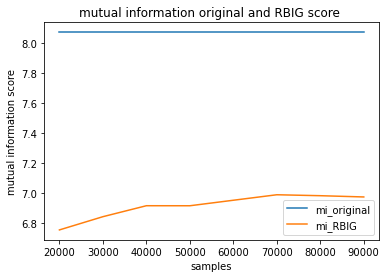

In [70]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi1['samples'].values
y1 = merged_mi1['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi1['samples'].values
y2 = merged_mi1['mi_RBIG'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_RBIG")
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information score')
# Set a title of the current axes.
plt.title('mutual information original and RBIG score ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


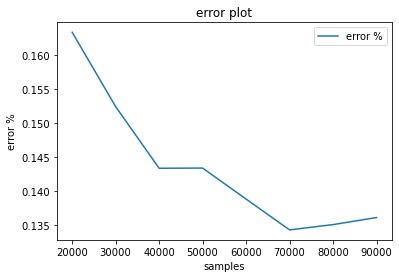

In [72]:
# line 1 points
x1 = merged_mi1['samples'].values
y1 = merged_mi1['error %'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error %")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Error calculation and error plot for comparing Histogram approximation with the original MI calculation, dim = 5

In [75]:
merged_mi2 = merged_mi(org_mi2,hist_mi1) # merging only rbig and original for dimension = 5
merged_mi2

,samples,mi_original,n_bins,dimensions,mi_hist
0,20000,5.70811,5,5,1.504601
1,30000,5.70811,5,5,1.522687
2,40000,5.70811,5,5,1.408862
3,50000,5.70811,5,5,1.409768
4,60000,5.70811,5,5,1.443256
5,70000,5.70811,5,5,1.311983
6,80000,5.70811,5,5,1.394782
7,90000,5.70811,5,5,1.338463


In [76]:
merged_mi2['error'] = merged_mi2['mi_original'] - merged_mi2['mi_hist']
merged_mi2['error %'] = abs(merged_mi2['error'])/(merged_mi2['mi_original'])
merged_mi2

,samples,mi_original,n_bins,dimensions,mi_hist,error,error %
0,20000,5.70811,5,5,1.504601,4.203509,0.736410
1,30000,5.70811,5,5,1.522687,4.185423,0.733241
2,40000,5.70811,5,5,1.408862,4.299248,0.753182
3,50000,5.70811,5,5,1.409768,4.298342,0.753024
4,60000,5.70811,5,5,1.443256,4.264854,0.747157
5,70000,5.70811,5,5,1.311983,4.396127,0.770155
6,80000,5.70811,5,5,1.394782,4.313328,0.755649
7,90000,5.70811,5,5,1.338463,4.369647,0.765516


#### Plots

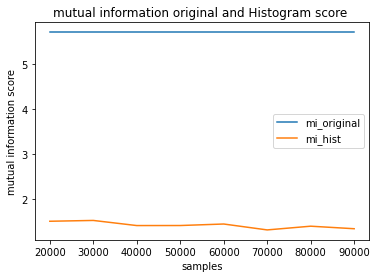

In [77]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi2['samples'].values
y1 = merged_mi2['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi2['samples'].values
y2 = merged_mi2['mi_hist'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_hist")
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information score')
# Set a title of the current axes.
plt.title('mutual information original and Histogram score ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


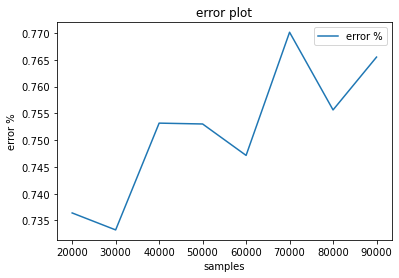

In [78]:
# line 1 points
x1 = merged_mi2['samples'].values
y1 = merged_mi2['error %'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error %")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Error calculation and error plot for comparing Histogram approximation with the original MI calculation, dim = 4

In [79]:
merged_mi3 = merged_mi(org_mi3,hist_mi2) # merging only rbig and original for dimension = 4
merged_mi3

,samples,mi_original,n_bins,dimensions,mi_hist
0,20000,3.298101,5,4,1.244225
1,30000,3.298101,5,4,1.197131
2,40000,3.298101,5,4,1.127419
3,50000,3.298101,5,4,1.165271
4,60000,3.298101,5,4,1.170109
5,70000,3.298101,5,4,1.164432
6,80000,3.298101,5,4,1.178806
7,90000,3.298101,5,4,1.140151


In [80]:
merged_mi3['error'] = merged_mi3['mi_original'] - merged_mi3['mi_hist']
merged_mi3['error %'] = abs(merged_mi3['error'])/(merged_mi3['mi_original'])
merged_mi3

,samples,mi_original,n_bins,dimensions,mi_hist,error,error %
0,20000,3.298101,5,4,1.244225,2.053875,0.622745
1,30000,3.298101,5,4,1.197131,2.100969,0.637024
2,40000,3.298101,5,4,1.127419,2.170681,0.658161
3,50000,3.298101,5,4,1.165271,2.132830,0.646684
4,60000,3.298101,5,4,1.170109,2.127991,0.645217
5,70000,3.298101,5,4,1.164432,2.133669,0.646939
6,80000,3.298101,5,4,1.178806,2.119294,0.642580
7,90000,3.298101,5,4,1.140151,2.157950,0.654301


#### Plots

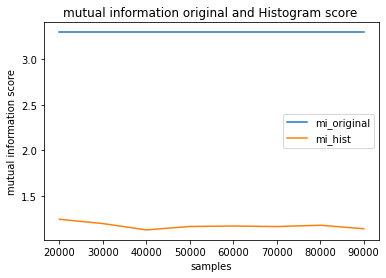

In [81]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi3['samples'].values
y1 = merged_mi3['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi3['samples'].values
y2 = merged_mi3['mi_hist'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_hist")
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information score')
# Set a title of the current axes.
plt.title('mutual information original and Histogram score ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


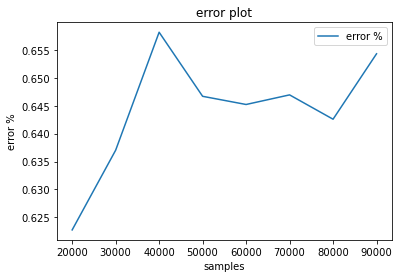

In [82]:
# line 1 points
x1 = merged_mi3['samples'].values
y1 = merged_mi3['error %'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error %")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

### Error calculation and error plot for comparing RBIG approximation with the original MI calculation, dim = 5

In [83]:
merged_mi4 = merged_mi(org_mi2,rbig_mi2) # merging only rbig and original for dimension = 5
merged_mi4

,samples,mi_original,mi_RBIG
0,20000,5.70811,2.308871
1,30000,5.70811,2.306580
2,40000,5.70811,2.302192
3,50000,5.70811,2.311176
4,60000,5.70811,2.310135
5,70000,5.70811,2.314141
6,80000,5.70811,2.305082
7,90000,5.70811,2.305796


In [84]:
merged_mi4['error'] = merged_mi4['mi_original'] - merged_mi4['mi_RBIG']
merged_mi4['error %'] = abs(merged_mi4['error'])/(merged_mi4['mi_original'])
merged_mi4

,samples,mi_original,mi_RBIG,error,error %
0,20000,5.70811,2.308871,3.399239,0.595510
1,30000,5.70811,2.306580,3.401530,0.595912
2,40000,5.70811,2.302192,3.405918,0.596681
3,50000,5.70811,2.311176,3.396934,0.595107
4,60000,5.70811,2.310135,3.397974,0.595289
5,70000,5.70811,2.314141,3.393969,0.594587
6,80000,5.70811,2.305082,3.403028,0.596174
7,90000,5.70811,2.305796,3.402314,0.596049


#### Plots

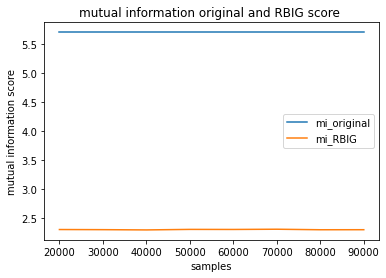

In [85]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi4['samples'].values
y1 = merged_mi4['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi4['samples'].values
y2 = merged_mi4['mi_RBIG'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_RBIG")
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information score')
# Set a title of the current axes.
plt.title('mutual information original and RBIG score ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


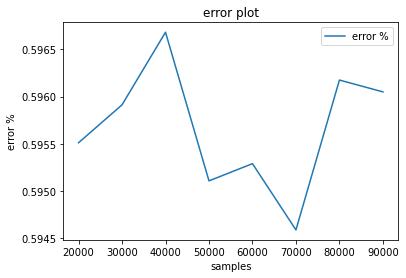

In [86]:
# line 1 points
x1 = merged_mi4['samples'].values
y1 = merged_mi4['error %'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error %")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error plot')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Merged table for Orig_mi, hist_mi and RBIG_mi for dim = 4

In [92]:
merged_mi6 = merged_mi(org_mi3,rbig_mi3) # merging only rbig and original for dimension = 5
merged_mi6 = merged_mi(merged_mi6,hist_mi2)
merged_mi6

,samples,mi_original,mi_RBIG,n_bins,dimensions,mi_hist
0,20000,3.298101,2.308871,5,4,1.244225
1,30000,3.298101,2.306580,5,4,1.197131
2,40000,3.298101,2.302192,5,4,1.127419
3,50000,3.298101,2.311176,5,4,1.165271
4,60000,3.298101,2.310135,5,4,1.170109
5,70000,3.298101,2.314141,5,4,1.164432
6,80000,3.298101,2.305082,5,4,1.178806
7,90000,3.298101,2.305796,5,4,1.140151


In [93]:
merged_mi6['error_org_hist'] = merged_mi6['mi_original'] - merged_mi6['mi_hist']
merged_mi6['error_org_rbig'] = merged_mi6['mi_original'] - merged_mi6['mi_RBIG']

merged_mi6['error % org_hist'] = abs(merged_mi6['error_org_hist'])/(merged_mi6['mi_original'])
merged_mi6['error % org_RBIG'] = abs(merged_mi6['error_org_rbig'])/(merged_mi6['mi_original'])

merged_mi6


,samples,mi_original,mi_RBIG,n_bins,dimensions,mi_hist,error_org_hist,error_org_rbig,error % org_hist,error % org_RBIG
0,20000,3.298101,2.308871,5,4,1.244225,2.053875,0.989229,0.622745,0.299939
1,30000,3.298101,2.306580,5,4,1.197131,2.100969,0.991521,0.637024,0.300634
2,40000,3.298101,2.302192,5,4,1.127419,2.170681,0.995909,0.658161,0.301964
3,50000,3.298101,2.311176,5,4,1.165271,2.132830,0.986925,0.646684,0.299240
4,60000,3.298101,2.310135,5,4,1.170109,2.127991,0.987965,0.645217,0.299556
5,70000,3.298101,2.314141,5,4,1.164432,2.133669,0.983960,0.646939,0.298341
6,80000,3.298101,2.305082,5,4,1.178806,2.119294,0.993019,0.642580,0.301088
7,90000,3.298101,2.305796,5,4,1.140151,2.157950,0.992304,0.654301,0.300871


## Plot

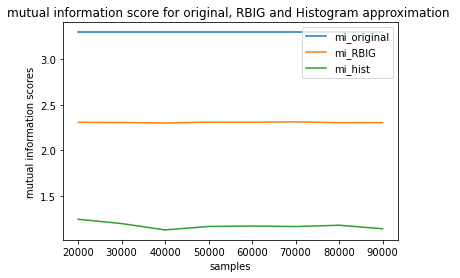

In [94]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi6['samples'].values
y1 = merged_mi6['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi6['samples'].values
y2 = merged_mi6['mi_RBIG'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_RBIG")

# line 3 points
x3 = merged_mi6['samples'].values
y3 = merged_mi6['mi_hist'].values
# plotting the line 3 points 
plt.plot(x3, y3, label = "mi_hist")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information scores')
# Set a title of the current axes.
plt.title('mutual information score for original, RBIG and Histogram approximation ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

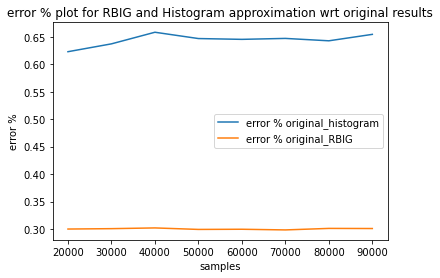

In [95]:
# line 1 points
x1 = merged_mi6['samples'].values
y1 = merged_mi6['error % org_hist'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error % original_histogram")

# line 2 points
x2 = merged_mi6['samples'].values
y2 = merged_mi6['error % org_RBIG'].values
# plotting the line 1 points 
plt.plot(x2, y2, label = "error % original_RBIG")

# Set the x axis label of the current axis.
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error % plot for RBIG and Histogram approximation wrt original results')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

## Merged table for Orig_mi, hist_mi and RBIG_mi for dim = 5

In [88]:
merged_mi5 = merged_mi(org_mi2,rbig_mi2) # merging only rbig and original for dimension = 5
merged_mi5 = merged_mi(merged_mi5,hist_mi1)
merged_mi5

,samples,mi_original,mi_RBIG,n_bins,dimensions,mi_hist
0,20000,5.70811,2.308871,5,5,1.504601
1,30000,5.70811,2.306580,5,5,1.522687
2,40000,5.70811,2.302192,5,5,1.408862
3,50000,5.70811,2.311176,5,5,1.409768
4,60000,5.70811,2.310135,5,5,1.443256
5,70000,5.70811,2.314141,5,5,1.311983
6,80000,5.70811,2.305082,5,5,1.394782
7,90000,5.70811,2.305796,5,5,1.338463


In [89]:
merged_mi5['error_org_hist'] = merged_mi5['mi_original'] - merged_mi5['mi_hist']
merged_mi5['error_org_rbig'] = merged_mi5['mi_original'] - merged_mi5['mi_RBIG']

merged_mi5['error % org_hist'] = abs(merged_mi5['error_org_hist'])/(merged_mi5['mi_original'])
merged_mi5['error % org_RBIG'] = abs(merged_mi5['error_org_rbig'])/(merged_mi5['mi_original'])

merged_mi5


,samples,mi_original,mi_RBIG,n_bins,dimensions,mi_hist,error_org_hist,error_org_rbig,error % org_hist,error % org_RBIG
0,20000,5.70811,2.308871,5,5,1.504601,4.203509,3.399239,0.736410,0.595510
1,30000,5.70811,2.306580,5,5,1.522687,4.185423,3.401530,0.733241,0.595912
2,40000,5.70811,2.302192,5,5,1.408862,4.299248,3.405918,0.753182,0.596681
3,50000,5.70811,2.311176,5,5,1.409768,4.298342,3.396934,0.753024,0.595107
4,60000,5.70811,2.310135,5,5,1.443256,4.264854,3.397974,0.747157,0.595289
5,70000,5.70811,2.314141,5,5,1.311983,4.396127,3.393969,0.770155,0.594587
6,80000,5.70811,2.305082,5,5,1.394782,4.313328,3.403028,0.755649,0.596174
7,90000,5.70811,2.305796,5,5,1.338463,4.369647,3.402314,0.765516,0.596049


## Plot

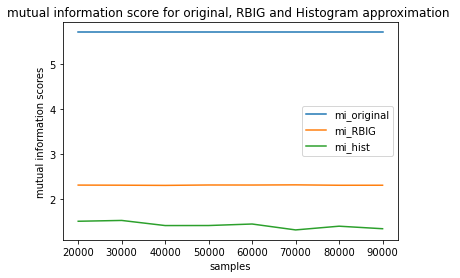

In [96]:
import matplotlib.pyplot as plt
# line 1 points
x1 = merged_mi5['samples'].values
y1 = merged_mi5['mi_original'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "mi_original")
# line 2 points
x2 = merged_mi5['samples'].values
y2 = merged_mi5['mi_RBIG'].values
# plotting the line 2 points 
plt.plot(x2, y2, label = "mi_RBIG")

# line 3 points
x3 = merged_mi5['samples'].values
y3 = merged_mi5['mi_hist'].values
# plotting the line 3 points 
plt.plot(x3, y3, label = "mi_hist")

plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('mutual information scores')
# Set a title of the current axes.
plt.title('mutual information score for original, RBIG and Histogram approximation ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

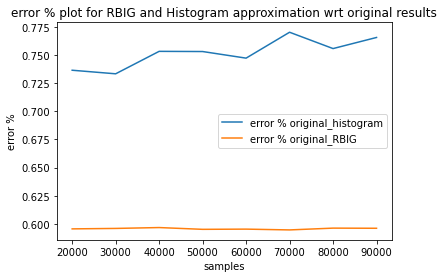

In [97]:
# line 1 points
x1 = merged_mi5['samples'].values
y1 = merged_mi5['error % org_hist'].values
# plotting the line 1 points 
plt.plot(x1, y1, label = "error % original_histogram")

# line 2 points
x2 = merged_mi5['samples'].values
y2 = merged_mi5['error % org_RBIG'].values
# plotting the line 1 points 
plt.plot(x2, y2, label = "error % original_RBIG")

# Set the x axis label of the current axis.
plt.xlabel('samples')
# Set the y axis label of the current axis.
plt.ylabel('error %')
# Set a title of the current axes.
plt.title('error % plot for RBIG and Histogram approximation wrt original results')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()